To give you an idea of the performance difference, consider a NumPy array of one million integers, and the equivalent Python list:

In [381]:
import numpy as np
my_arr = np.arange(1000000)
my_list = list(range(1000000))

Now let’s multiply each sequence by 2:

In [382]:
%time for _ in range(10): my_arr2 = my_arr * 2

CPU times: user 24.4 ms, sys: 9.86 ms, total: 34.3 ms
Wall time: 79.3 ms


In [383]:
%time for _ in range(10): my_list2 = [x * 2 for x in my_list]

CPU times: user 989 ms, sys: 209 ms, total: 1.2 s
Wall time: 1.2 s


# 4.1 The NumPy ndarray: A Multidimensional Array Object

One of the key features of NumPy is its **N-dimensional** array object, or ndarray, which is a fast, flexible container for large datasets in Python. Arrays enable you to perform mathematical operations on whole blocks of data using similar syntax to the equivalent operations between scalar elements

In [384]:
data = np.random.randn(2, 3)
data

array([[-1.15780973, -0.32409358, -0.28120767],
       [-2.59768786, -0.76134052, -0.54247271]])

I then write mathematical operations with data:

In [385]:
data * 10

array([[-11.57809733,  -3.24093584,  -2.81207667],
       [-25.9768786 ,  -7.61340524,  -5.42472712]])

In [386]:
data + data

array([[-2.31561947, -0.64818717, -0.56241533],
       [-5.19537572, -1.52268105, -1.08494542]])

An ndarray is a generic multidimensional container for homogeneous data; that is, **all of the elements must be the same type**

Every array has a shape, a tuple indicating the size of each dimension, and a dtype, an object describing the data type of the array:

In [387]:
data.shape

(2, 3)

In [388]:
data.dtype

dtype('float64')

## Creating ndarrays

The easiest way to create an array is to use the array function

This accepts any sequence-like object (including other arrays) and produces a new NumPy array con taining the passed data

For example, a list is a good candidate for conversion:

In [389]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

Nested sequences, like a list of equal-length lists, will be converted into a multidimen sional array:

In [390]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

Since data2 was a list of lists, the NumPy array arr2 has two dimensions with shape inferred from the data

We can confirm this by inspecting the ndim and shape attributes:

In [391]:
arr2.ndim

2

In [392]:
arr2.shape

(2, 4)

Unless explicitly specified (more on this later), np.array tries to infer a good data type for the array that it creates

The data type is stored in a special dtype metadata object; for example, in the previous two examples we have:

In [393]:
arr1.dtype

dtype('float64')

In [394]:
arr2.dtype

dtype('int64')

zeros and ones create arrays of 0s or 1s, respectively, with a given length or shape. empty creates an array without initializing its values to any particular value

In [395]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [396]:
np.zeros((3, 6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

It’s not safe to assume that np.empty will return an array of all zeros. In some cases, it may return uninitialized “garbage” values

In [397]:
np.empty((2, 3, 2))

array([[[5., 5.],
        [5., 5.],
        [3., 3.]],

       [[3., 3.],
        [1., 1.],
        [1., 1.]]])

arange is an array-valued version of the built-in Python range function:

In [398]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

See Table 4-1 for a short list of standard array creation functions. Since NumPy is focused on numerical computing, the data type, if not specified, will in many cases be float64

Table 4-1. Array creation functions
<p align='center'>
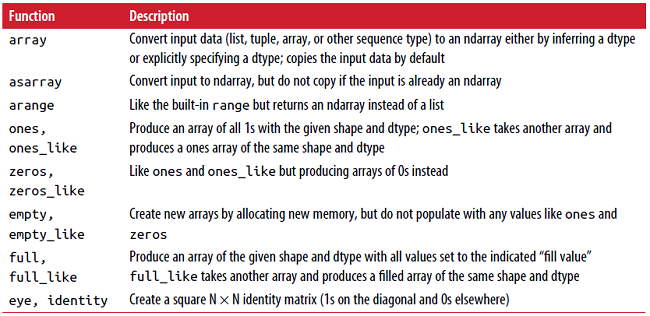
</p>

## Data Types for ndarrays

The data type or dtype is a special object containing **the information (or metadata, data about data) the ndarray needs to interpret a chunk of memory as a particular type of data**:

In [399]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)

In [400]:
arr1.dtype

dtype('float64')

In [401]:
arr2.dtype

dtype('int32')

See Table 4-2 for a full listing of NumPy’s supported data types

Table 4-2. NumPy data types
<p align='center'>
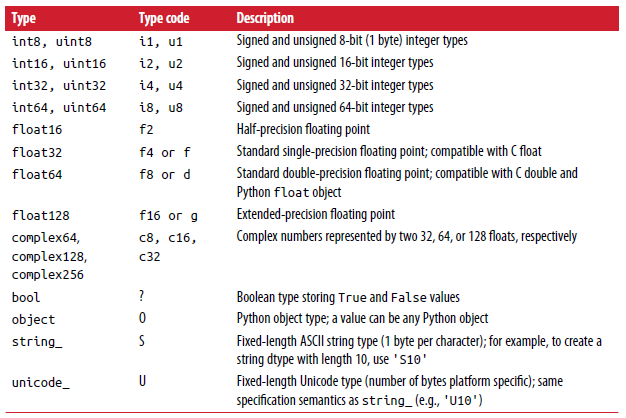
</p>

You can explicitly convert or cast an array from one dtype to another using ndarray’ astype method:

In [402]:
arr = np.array([1, 2, 3, 4, 5])

In [403]:
arr.dtype

dtype('int64')

In [404]:
float_arr = arr.astype(np.float64)

In [405]:
float_arr.dtype

dtype('float64')

In this example, integers were cast to floating point. **If I cast some floating-point numbers to be of integer dtype, the decimal part will be truncated:**

In [406]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])

In [407]:
arr

array([ 3.7, -1.2, -2.6,  0.5, 12.9, 10.1])

In [408]:
arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10], dtype=int32)

If you have an array of **strings** representing numbers, you can use astype to convert them to **numeric** form:

In [409]:
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)

In [410]:
numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

If casting were to fail for some reason (like a string that cannot be converted to float64), a ValueError will be raised

Here I was a bit lazy and wrote float instead of np .float64; **NumPy aliases the Python types to its own equivalent data dtypes**

In [411]:
int_array = np.arange(10)

In [412]:
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)

In [413]:
int_array.astype(calibers.dtype)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

There are shorthand type code strings you can also use to refer to a dtype:

In [414]:
empty_uint32 = np.empty(8, dtype='u4')

In [415]:
empty_uint32

array([         0, 1075314688,          0, 1075707904,          0,
       1075838976,          0, 1072693248], dtype=uint32)

Calling astype always creates a new array (a copy of the data), even if the new dtype is the same as the old dtype

## Arithmetic with NumPy Arrays

Arrays are important because they enable you to **express batch operations on data without writing any for loops. NumPy users call this vectorization**

Any arithmetic operations between equal-size arrays applies the operation element-wise:

In [416]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])

In [417]:
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [418]:
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [419]:
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

Arithmetic operations with scalars propagate the scalar argument to each element in the array:

In [420]:
1 / arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [421]:
arr ** 0.5

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

Comparisons between arrays of the same size yield boolean arrays:

In [422]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])

In [423]:
arr2

array([[ 0.,  4.,  1.],
       [ 7.,  2., 12.]])

In [424]:
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]])

Operations between differently sized arrays is called broadcasting

## Basic Indexing and Slicing

There are many ways you may want to select a subset of your data or individual elements

One-dimensional arrays are simple; on the surface they act similarly to Python lists:

In [425]:
arr = np.arange(10)

In [426]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [427]:
arr[5]

5

In [428]:
arr[5:8]

array([5, 6, 7])

In [429]:
arr[5:8] = 12

In [430]:
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

If you assign a scalar value to a slice, as in arr[5:8] = 12, the value is propageted (or broadcasted) to the entire selection

An important first distinction from Python’s built-in lists is that array slices are views on the original array. This means that **the data is not copied, and any modifications to the view will be reflected in the source array**

To give an example of this, I first create a slice of arr:

In [431]:
arr_slice = arr[5:8]

In [432]:
arr_slice

array([12, 12, 12])

Now, when I change values in arr_slice, the mutations are reflected in the original array arr:

In [433]:
arr_slice[1] = 12345

In [434]:
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

The “bare” slice [:] will assign to all values in an array:

In [435]:
arr_slice[:] = 64

In [436]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

If you want a copy of a slice of an ndarray instead of a view, you will need to explicitly copy the array

In [437]:
arr[5:8].copy()

array([64, 64, 64])

With higher dimensional arrays, you have many more options

In a two-dimensional array, the elements at each index are no longer scalars but rather one-dimensional arrays:

In [438]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

In [439]:
arr2d[2]

array([7, 8, 9])

Thus, individual elements can be accessed recursively

But that is a bit too much work, so you can pass a comma-separated list of indices to select individual elements. So these are equivalent



In [440]:
arr2d[0][2]

3

In [441]:
arr2d[0, 2]

3

See Figure 4-1 for an illustration of indexing on a two-dimensional array

<p align='center'>
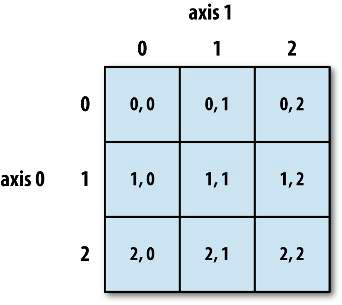
</p>

Figure 4-1. Indexing elements in a NumPy array

In multidimensional arrays, if you omit later indices, the returned object will be a lower dimensional ndarray consisting of all the data along the higher dimensions

So in the 2 x 2 x 3 array arr3d:

In [442]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])

In [443]:
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

arr3d[0] is a 2 x 3 array

In [444]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

Both scalar values and arrays can be assigned to arr3d [0]:

In [445]:
old_values = arr3d[0].copy()

In [446]:
arr3d[0] = 42

In [447]:
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [448]:
arr3d[0] = old_values

In [449]:
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

Similarly, arr3d[1, 0] gives you all of the values whose indices start with (1, 0), forming a 1-dimensional array:

In [450]:
arr3d[1, 0]

array([7, 8, 9])

This expression is the same as though we had indexed in two steps:

In [451]:
x = arr3d[1]

In [452]:
x

array([[ 7,  8,  9],
       [10, 11, 12]])

In [453]:
x[0]

array([7, 8, 9])

### Indexing with slices

Like one-dimensional objects such as Python lists, ndarrays can be sliced with the familiar syntax:

In [454]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [455]:
arr[1:6]

array([ 1,  2,  3,  4, 64])

Consider the two-dimensional array from before, arr2d. Slicing this array is a bit different:

In [456]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [457]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

As you can see, it has sliced along axis 0, the first axis

A slice, therefore, selects a range of elements along an axis. It can be helpful to read the expression **arr2d[:2] as “select the first two rows of arr2d.”**

You can pass multiple slices just like you can pass multiple indexes:

In [458]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

When slicing like this, you always obtain array views of the same number of dimensions

By mixing integer indexes and slices, you get lower dimensional slices

For example, I can select the second row but only the first two columns like so:

In [459]:
arr2d[1, :2]

array([4, 5])

Similarly, I can select the third column but only the first two rows like so:

In [460]:
arr2d[:2, 2]

array([3, 6])

See Figure 4-2 for an illustration. Note that **a colon by itself means to take the entire axis**, so you can slice only higher dimensional axes by doing:

In [461]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

Of course, assigning to a slice expression assigns to the whole selection:

In [462]:
arr2d[:2, 1:] = 0

In [463]:
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

<p align='center'>
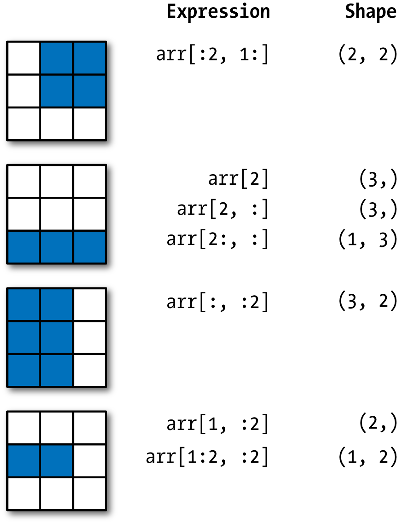
</p>
Figure 4-2. Two-dimensional array slicing

## Boolean Indexing

Let’s consider an example where we have some data in an array and an array of names with duplicates

I’m going to use here the randn.random function in numpy to generate some random normally distributed data:

In [464]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])

In [465]:
data = np.random.randn(7, 4)

In [466]:
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [467]:
data

array([[ 0.38878452, -1.02748626,  0.5865103 , -1.2824554 ],
       [-0.72773616, -0.466983  ,  0.03191736, -0.86296003],
       [-0.72079429, -1.11170615, -0.5302076 , -1.51026184],
       [-0.25636484,  0.41174148, -0.42822313, -0.10677195],
       [ 1.70711665,  0.7590158 ,  0.92003409, -0.46021864],
       [ 0.30760502,  0.37955507,  1.0688323 , -0.55996519],
       [-0.81142337,  0.62647142, -1.94295234, -0.73168696]])

Suppose each name corresponds to a row in the data array and we wanted to select all the rows with corresponding name 'Bob'

Like arithmetic operations, **comparisons (such as ==) with arrays are also vectorized. Thus, comparing names with the string 'Bob' yields a boolean array**:


In [468]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

This boolean array can be passed when indexing the array:

In [469]:
data[names == 'Bob'] # Row 0 and Row 3

array([[ 0.38878452, -1.02748626,  0.5865103 , -1.2824554 ],
       [-0.25636484,  0.41174148, -0.42822313, -0.10677195]])

**The boolean array must be of the same length as the array axis it’s indexing**. You can even mix and match boolean arrays with slices or integers (or sequences of integers)

In these examples, I select from the rows where names == 'Bob' and index the columns, too:

In [470]:
data[names == 'Bob', 2:]

array([[ 0.5865103 , -1.2824554 ],
       [-0.42822313, -0.10677195]])

In [471]:
data[names == 'Bob', 3]

array([-1.2824554 , -0.10677195])

To select everything but 'Bob', you can either use != or negate the condition using ~:

In [472]:
names != 'Bob'

array([False,  True,  True, False,  True,  True,  True])

In [473]:
data[~(names == 'Bob')]

array([[-0.72773616, -0.466983  ,  0.03191736, -0.86296003],
       [-0.72079429, -1.11170615, -0.5302076 , -1.51026184],
       [ 1.70711665,  0.7590158 ,  0.92003409, -0.46021864],
       [ 0.30760502,  0.37955507,  1.0688323 , -0.55996519],
       [-0.81142337,  0.62647142, -1.94295234, -0.73168696]])

The ~ operator can be useful when you want to invert a general condition:

In [474]:
cond = names == 'Bob'

In [475]:
data[~cond]

array([[-0.72773616, -0.466983  ,  0.03191736, -0.86296003],
       [-0.72079429, -1.11170615, -0.5302076 , -1.51026184],
       [ 1.70711665,  0.7590158 ,  0.92003409, -0.46021864],
       [ 0.30760502,  0.37955507,  1.0688323 , -0.55996519],
       [-0.81142337,  0.62647142, -1.94295234, -0.73168696]])

Selecting two of the three names to combine multiple boolean conditions, use boolean arithmetic operators like **& (and) and | (or)**:

In [476]:
mask = (names == 'Bob') | (names == 'Will')

In [477]:
mask

array([ True, False,  True,  True,  True, False, False])

In [478]:
data[mask]

array([[ 0.38878452, -1.02748626,  0.5865103 , -1.2824554 ],
       [-0.72079429, -1.11170615, -0.5302076 , -1.51026184],
       [-0.25636484,  0.41174148, -0.42822313, -0.10677195],
       [ 1.70711665,  0.7590158 ,  0.92003409, -0.46021864]])

Selecting data from an array by **boolean indexing always creates a copy of the data**, even if the returned array is unchanged

Setting values with boolean arrays works in a common-sense way. To set all of the negative values in data to 0 we need only do:

In [479]:
data[data < 0] = 0

In [480]:
data

array([[0.38878452, 0.        , 0.5865103 , 0.        ],
       [0.        , 0.        , 0.03191736, 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.41174148, 0.        , 0.        ],
       [1.70711665, 0.7590158 , 0.92003409, 0.        ],
       [0.30760502, 0.37955507, 1.0688323 , 0.        ],
       [0.        , 0.62647142, 0.        , 0.        ]])

Setting whole rows or columns using a one-dimensional boolean array is also easy:

In [481]:
data[names != 'Joe'] = 7

In [482]:
data

array([[7.        , 7.        , 7.        , 7.        ],
       [0.        , 0.        , 0.03191736, 0.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [0.30760502, 0.37955507, 1.0688323 , 0.        ],
       [0.        , 0.62647142, 0.        , 0.        ]])

## Fancy Indexing

**Fancy indexing** is a term adopted by NumPy to **describe indexing using integer arrays**
Suppose we had an 8 × 4 array:

In [483]:
arr = np.empty((8, 4))

In [484]:
for i in range(8):
  arr[i] = i

In [485]:
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

To select out a subset of the rows in a particular order, you can simply pass a list or ndarray of integers specifying the desired order:

In [486]:
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

Using negative indices selects rows from the end:

In [487]:
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

Passing multiple index arrays does something slightly different; it selects a one dimensional array of elements corresponding to each tuple of indices:

In [488]:
arr = np.arange(32).reshape((8, 4))

In [489]:
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [490]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

Here the elements (1, 0), (5, 3), (7, 1), and (2, 2) were selected

Regardless of how many dimensions the array has (here, only 2), the result of fancy indexing is always one-dimensional

The behavior of fancy indexing in this case is a bit different from what some users might have expected, which is the rectangular region formed by selecting a subset of the matrix’s rows and columns

Here is one way to get that:

In [491]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

Keep in mind that fancy indexing, unlike slicing, always copies the data into a new array

## Transposing Arrays and Swapping Axes

Transposing is a special form of reshaping that similarly returns a view on the underlying data without copying anything

Arrays have the transpose method and also the special T attribute:

In [492]:
arr = np.arange(15).reshape((3, 5))

In [493]:
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [494]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

When doing matrix computations, you may do this very often—for example, when computing the inner matrix product using np .dot:

In [495]:
arr = np.random.randn(6, 3)

In [496]:
arr

array([[-1.65500158, -0.68112244, -1.98203105],
       [ 0.81439547,  0.15053726, -0.80449255],
       [-0.72665247, -0.73231679,  1.56855008],
       [-1.85932318,  0.66339929,  0.03647722],
       [ 0.61049276,  1.5108909 ,  0.37331017],
       [ 0.485883  ,  0.33681992,  0.87050917]])

In [497]:
np.dot(arr.T, arr)

array([[7.99616044, 1.63456473, 2.06834445],
       [1.63456473, 3.85921468, 0.96165889],
       [2.06834445, 0.96165889, 7.93448196]])

For higher dimensional arrays, transpose will accept a tuple of axis numbers to permute the axes

In [498]:
arr = np.arange(16).reshape((2, 2, 4))

In [499]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [500]:
arr.transpose((1, 0, 2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

Here, the axes have been reordered with the second axis first, the first axis second, and the last axis unchanged

Simple transposing with .T is a special case of swapping axes

ndarray has the method swapaxes, which takes a pair of axis numbers and switches the indicated axes to rear range the data:

In [501]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [502]:
arr.swapaxes(1, 2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

swapaxes similarly returns a view on the data without making a copy

# 4.2 Universal Functions: Fast Element-Wise Array Functions

A universal function, or **ufunc, is a function that performs element-wise operations on data in ndarrays**

You can think of them as fast vectorized wrappers for simple functions that take one or more scalar values and produce one or more scalar results

In [503]:
arr = np.arange(10)

In [504]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [505]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [506]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

These are referred to as unary ufuncs. Others, such as add or maximum, take two arrays (thus, binary ufuncs) and return a single array as the result:

In [507]:
x = np.random.randn(8)

In [508]:
y = np.random.randn(8)

In [509]:
x

array([-1.86276101, -0.12257763, -0.20800147, -0.0810525 , -0.30726976,
       -0.34526932,  0.7002868 ,  1.7679603 ])

In [510]:
y

array([-0.93027172,  0.83456206, -0.33284838,  3.10737039,  0.00596248,
        0.89967005,  0.04127854, -0.39947651])

In [511]:
np.maximum(x, y)

array([-0.93027172,  0.83456206, -0.20800147,  3.10737039,  0.00596248,
        0.89967005,  0.7002868 ,  1.7679603 ])

Here, numpy.maximum computed the element-wise maximum of the elements in x and y

While not common, a ufunc can return multiple arrays. modf is one example, a vectorized version of the built-in Python divmod; it returns the fractional and integral parts of a floating-point array:

In [512]:
arr = np.random.randn(7) * 5

In [513]:
arr

array([ -4.85027525,  -3.62582184,   2.02915367,  -1.10668771,
       -10.62028999,   4.03041517,   5.03844832])

In [514]:
remainder, whole_part = np.modf(arr)

In [515]:
remainder

array([-0.85027525, -0.62582184,  0.02915367, -0.10668771, -0.62028999,
        0.03041517,  0.03844832])

In [516]:
whole_part

array([ -4.,  -3.,   2.,  -1., -10.,   4.,   5.])

Ufuncs accept an optional out argument that allows them to operate in-place on arrays:

In [517]:
arr

array([ -4.85027525,  -3.62582184,   2.02915367,  -1.10668771,
       -10.62028999,   4.03041517,   5.03844832])

In [518]:
np.sqrt(arr)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([       nan,        nan, 1.42448365,        nan,        nan,
       2.00758939, 2.24464882])

In [519]:
np.sqrt(arr, arr)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([       nan,        nan, 1.42448365,        nan,        nan,
       2.00758939, 2.24464882])

In [520]:
arr

array([       nan,        nan, 1.42448365,        nan,        nan,
       2.00758939, 2.24464882])

See Tables 4-3 and 4-4 for a listing of available ufuncs

Table 4-3. Unary ufuncs
<p align='center'>
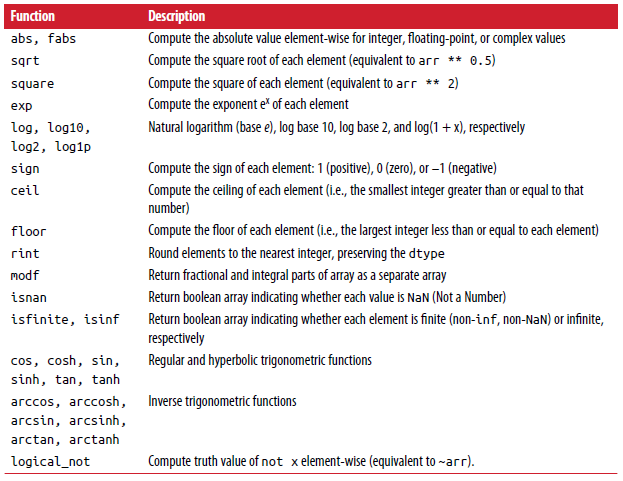
</p>

Table 4-4. Binary universal functions
<p align='center'>
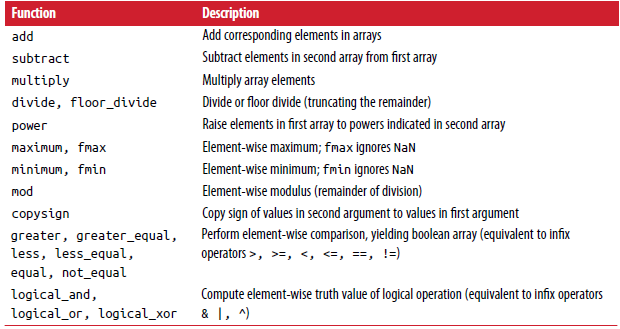
</p>

# 4.3 Array-Oriented Programming with Arrays

Using NumPy arrays enables you to express many kinds of data processing tasks as concise array expressions that might otherwise require writing loops

**This practice of replacing explicit loops with array expressions is commonly referred to as vectorization**



Suppose we wished to evaluate the function sqrt(x^2 + y^2) across a regular grid of values

The np.meshgrid function takes two 1D arrays and produces two 2D matrices corresponding to all pairs of
(x, y)
in the two arrays:

In [521]:
points = np.arange(-5, 5, 0.01) # 1000 equally spaced points

In [522]:
xs, ys = np.meshgrid(points, points)

In [523]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

Now, evaluating the function is a matter of writing the same expression you would write with two points:

In [524]:
z = np.sqrt(xs ** 2 + ys ** 2)

In [525]:
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

I use matplotlib to create visualizations of this two dimensional array:

In [526]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

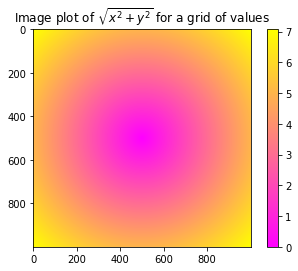

In [527]:
plt.imshow(z, cmap=plt.cm.spring); plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

Here I used the matplotlib function imshow to create an image plot from a two-dimensional array of function values

## Expressing Conditional Logic as Array Operations

**The numpy.where function is a vectorized version of the ternary expression x if condition else y**

Suppose we had a boolean array and two arrays of values:

In [528]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])

In [529]:
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])

In [530]:
cond = np.array([True, False, True, True, False])

Suppose we wanted to take a value from xarr whenever the corresponding value in cond is True, and otherwise take the value from yarr

A list comprehension doing this might look like:

In [531]:
result = [(x if c else y) for x, y, c in zip(xarr, yarr, cond)]

In [532]:
result

[1.1, 2.2, 1.3, 1.4, 2.5]

This has multiple problems. First, it will not be very fast for large arrays (because all the work is being done in interpreted Python code)

Second, it will not work with multidimensional arrays. With np.where you can write this very concisely:

In [533]:
result = np.where(cond, xarr, yarr)

In [534]:
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

**The second and third arguments to np.where don’t need to be arrays**; one or both of them can be scalars

**A typical use of where in data analysis is to produce a new array of values based on another array**

Suppose you had a matrix of randomly generated data and you wanted to replace all positive values with 2 and all negative values with –2. This is very easy to do with np .where:

In [535]:
arr = np.random.randn(4, 4)

In [536]:
arr

array([[ 4.59823749e-01,  2.06664958e+00,  5.74323488e-04,
         3.55255532e-01],
       [ 1.95820060e-01,  8.72284059e-01,  2.14823001e-01,
        -1.41464877e+00],
       [-2.37982088e-02, -4.37205576e-01, -1.16062571e-01,
        -1.40719024e+00],
       [ 1.44110532e+00,  6.44560302e-01,  1.41261678e+00,
        -1.05196801e+00]])

In [537]:
arr > 0

array([[ True,  True,  True,  True],
       [ True,  True,  True, False],
       [False, False, False, False],
       [ True,  True,  True, False]])

In [538]:
np.where(arr > 0, 2, -2)

array([[ 2,  2,  2,  2],
       [ 2,  2,  2, -2],
       [-2, -2, -2, -2],
       [ 2,  2,  2, -2]])

You can combine scalars and arrays when using np. where

For example, I can replace all positive values in arr with the constant 2 like so:

In [539]:
np.where(arr > 0, 2, arr)

array([[ 2.        ,  2.        ,  2.        ,  2.        ],
       [ 2.        ,  2.        ,  2.        , -1.41464877],
       [-0.02379821, -0.43720558, -0.11606257, -1.40719024],
       [ 2.        ,  2.        ,  2.        , -1.05196801]])

**The arrays passed to np.where can be more than just equal-sized arrays or scalars**

## Mathematical and Statistical Methods

A set of mathematical functions that compute statistics about an entire array or about the data along an axis are accessible as methods of the array class

**You can use aggreations (often called reductions)** like sum, mean, and std (standard deviation) either **by calling the array instance method or using the top-level NumPy function**

In [540]:
arr = np.random.randn(5, 4)

In [541]:
arr

array([[-0.01874163, -1.85616614,  0.73809325, -0.44326447],
       [-0.37069063, -0.55820329,  0.36048971,  0.61644341],
       [ 0.88718848,  0.67013746, -0.77245312,  0.09568686],
       [-0.10556531, -0.44519467,  0.7655989 ,  0.04219041],
       [ 0.62933952,  1.98144881,  1.58668588,  0.77529264]])

In [542]:
arr.mean()

0.228915803511814

In [543]:
np.mean(arr)

0.228915803511814

In [544]:
arr.sum()

4.57831607023628

Functions like mean and sum take an optional axis argument that computes the statistic over the given axis, resulting in an array with one fewer dimension:

In [545]:
arr.mean(axis=1)

array([-0.39501975,  0.0120098 ,  0.22013992,  0.06425733,  1.24319171])

In [546]:
arr.sum(axis=0)

array([ 1.02153043, -0.20797783,  2.67841462,  1.08634885])

Here, arr.mean(1) means “compute mean across the columns” where arr.sum(0) means “compute sum down the rows.”

In [547]:
arr.mean(1)

array([-0.39501975,  0.0120098 ,  0.22013992,  0.06425733,  1.24319171])

In [548]:
arr.sum(0)

array([ 1.02153043, -0.20797783,  2.67841462,  1.08634885])

Other methods like cumsum and cumprod do not aggregate, instead producing an array of the intermediate results:

In [549]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])

In [550]:
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28])

In multidimensional arrays, accumulation functions like cumsum return an array of the same size, but with the partial aggregates computed along the indicated axis according to each lower dimensional slice:

In [551]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])

In [552]:
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [553]:
arr.cumsum(axis=0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

In [554]:
arr.cumprod(axis=1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]])

See Table 4-5 for a full listing

Table 4-5. Basic array statistical methods
<p align='center'>
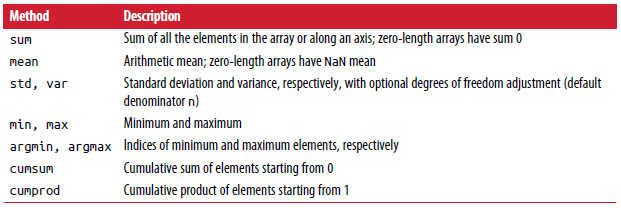
</p>

## Methods for Boolean Arrays

Boolean values are coerced to 1 (True) and 0 (False) in the preceding methods

Thus, sum is often used as a means of counting True values in a boolean array:

In [555]:
arr = np.random.randn(100)

In [556]:
(arr > 0).sum() # Number of positive values

51

There are two additional methods, any and all, useful especially for boolean arrays

**any tests whether one or more values in an array is True, while all checks if every value is True:**

In [557]:
bools = np.array([False, False, True, False])

In [558]:
bools.any()

True

In [559]:
bools.all()

False

These methods also work with non-boolean arrays, where **non-zero elements evaluate to True**

## Sorting

Like Python’s built-in list type, NumPy arrays can be sorted in-place with the sort method:

In [560]:
arr = np.random.randn(6)

In [561]:
arr

array([ 1.04235958, -0.73865283, -1.06014964, -0.32366719,  0.06320934,
       -0.6192925 ])

In [562]:
arr.sort()

In [563]:
arr

array([-1.06014964, -0.73865283, -0.6192925 , -0.32366719,  0.06320934,
        1.04235958])

You can sort each one-dimensional section of values in a multidimensional array inplace along an axis by passing the axis number to sort:

In [564]:
arr = np.random.randn(5, 3)

In [565]:
arr

array([[ 0.077423  ,  2.60179586, -0.67046989],
       [-0.31383308,  0.15891405,  0.02403909],
       [ 0.5040206 , -0.26663992,  0.26687785],
       [-1.67824989, -1.81491805, -2.11301833],
       [-0.12967786, -0.68213249, -0.46550284]])

In [566]:
arr.sort(1)

In [567]:
arr

array([[-0.67046989,  0.077423  ,  2.60179586],
       [-0.31383308,  0.02403909,  0.15891405],
       [-0.26663992,  0.26687785,  0.5040206 ],
       [-2.11301833, -1.81491805, -1.67824989],
       [-0.68213249, -0.46550284, -0.12967786]])

The top-level method np.sort returns a sorted copy of an array instead of modifying the array in-place

**A quick-and-dirty way to compute the quantiles of an array is to sort it and select the value at a particular rank:**

In [568]:
large_arr = np.random.randn(1000)

In [569]:
large_arr.sort()

In [570]:
large_arr[int(0.05 * len(large_arr))]

-1.5153667713682262

## Unique and Other Set Logic

NumPy has some basic set operations for one-dimensional ndarrays. A commonly used one is np .unique, which **returns the sorted unique values in an array:**

In [571]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])

In [572]:
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [573]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])

In [574]:
np.unique(ints)

array([1, 2, 3, 4])

Contrast np.unique with the pure Python alternative:

In [575]:
sorted(set(names))

['Bob', 'Joe', 'Will']

Another function, **np.in1d, tests membership of the values in one array in another, returning a boolean array:**

In [576]:
values = np.array([6, 0, 0, 3, 2, 5, 6])

In [577]:
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

See Table 4-6 for a listing of set functions in NumPy

Table 4-6. Array set operations
<p align='center'>
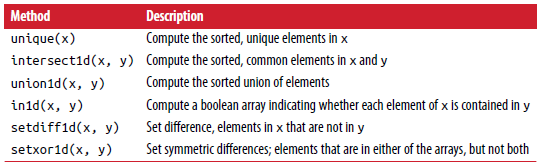
</p>

# 4.4 File Input and Output with Arrays

NumPy is able to save and load data to and from disk either in text or binary format

np.save and np.load are the two workhorse functions for efficiently saving and loading array data on disk

Arrays are saved by default in an uncompressed raw binary format with file extension .npy:

In [578]:
arr = np.arange(10)

In [579]:
np.save('some_array', arr)

**If the file path does not already end in .npy, the extension will be appended**

The array on disk can then be loaded with np.load:

In [580]:
#np.load('some_array.npy')

You save multiple arrays in an uncompressed archive using np.savez and passing the arrays as keyword arguments:

In [581]:
np.savez('array_archive.npz', a=arr, b=arr)

When loading an .npz file, you get back a dict-like object that loads the individual arrays lazily:

In [582]:
arch = np.load('array_archive.npz')

In [583]:
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

If your data compresses well, you may wish to use numpy.savez_compressed instead:

In [584]:
np.savez_compressed('arrays_compressed.npz', a=arr, b=arr)

# 4.5 Linear Algebra

Linear algebra, like matrix multiplication, decompositions, determinants, and other square matrix math, is an important part of any array library

There is a function dot, both an array method and a function in the numpy namespace, for matrix multiplication:

In [585]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])

In [586]:
y = np.array([[6., 23.], [-1, 7], [8, 9]])

In [587]:
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [588]:
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [589]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

x.dot(y) is equivalent to np.dot(x, y):

In [590]:
np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

A matrix product between a two-dimensional array and a suitably sized one dimensional array results in a one-dimensional array:

In [591]:
np.dot(x, np.ones(3))

array([ 6., 15.])

The @ symbol (as of Python 3.5) also works as an infix operator that performs matrix multiplication:

In [592]:
x @ np.ones(3)

array([ 6., 15.])

numpy.linalg has a standard set of matrix decompositions and things like inverse and determinant



In [593]:
from numpy.linalg import inv, qr

In [594]:
X = np.random.randn(5, 5)

In [595]:
mat = X.T.dot(X)

In [596]:
inv(mat)

array([[ 3.20975709, -2.015813  ,  3.04823617, -2.18611063,  0.41496588],
       [-2.015813  ,  3.13308776, -3.1596128 ,  2.84639178, -0.74193496],
       [ 3.04823617, -3.1596128 ,  4.27238269, -3.44549979,  0.94843455],
       [-2.18611063,  2.84639178, -3.44549979,  3.1127015 , -1.05518362],
       [ 0.41496588, -0.74193496,  0.94843455, -1.05518362,  0.73482878]])

In [597]:
mat.dot(inv(mat))

array([[ 1.00000000e+00,  7.87517490e-16, -1.60410297e-15,
         1.13862254e-15, -1.19597145e-16],
       [ 1.98760079e-15,  1.00000000e+00,  2.67956839e-15,
        -8.38716515e-16,  1.06075269e-15],
       [ 2.46534547e-16,  7.24974063e-16,  1.00000000e+00,
         5.09654928e-16,  3.87825065e-16],
       [ 1.83454461e-15,  1.53447664e-15, -3.31407638e-15,
         1.00000000e+00,  1.20728292e-16],
       [ 1.92009704e-15, -1.74991881e-15,  1.78540769e-15,
        -3.78675023e-15,  1.00000000e+00]])

In [598]:
q, r = qr(mat)

The expression X.T.dot(X) computes the dot product of X with its transpose X .T

See Table 4-7 for a list of some of the most commonly used linear algebra functions

Table 4-7. Commonly used numpy.linalg functions

<p align='center'>
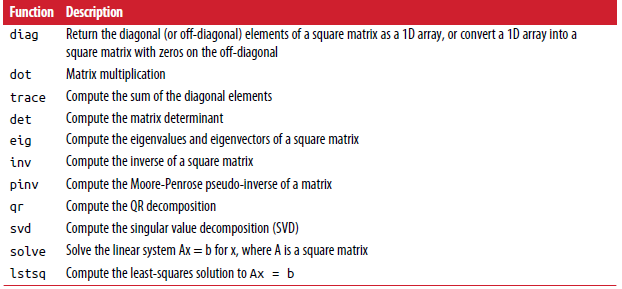
</p>

# 4.6 Pseudorandom Number Generation

The numpy.random module supplements the built-in Python random with functions for efficiently generating whole arrays of sample values from many kinds of probability distributions

For example, you can get a 4 4 array of samples from the standard normal distribution using normal:

In [599]:
samples = np.random.normal(size=(4, 4))

In [600]:
samples

array([[ 1.71231848,  1.20945814, -0.06172505,  0.39632253],
       [-1.10714395,  2.06273818,  0.84444216,  1.44252016],
       [-0.44546245, -1.26094725,  0.39826691, -0.63665564],
       [-0.83864085,  1.12028365, -1.13599591,  1.83246206]])

Python’s built-in random module, by contrast, only samples one value at a time

As you can see from this benchmark, numpy.random is well over an order of magnitude faster for generating very large samples:

In [601]:
from random import normalvariate

In [602]:
N = 1000000

In [603]:
%timeit samples = [normalvariate(0, 1) for _ in range(N)]

1 loop, best of 5: 977 ms per loop


In [604]:
%timeit samples = np.random.normal(size=N)

10 loops, best of 5: 45.5 ms per loop


We say that these are pseudorandom numbers because they are **generated by an algorithm with deterministic behavior based on the seed of the random number generator**

You can change Numpy's random number generation seed using np.random.seed:

In [605]:
np.random.seed(1234)

**The data generation functions in numpy.random use a global random seed**

To avoid global state, you can use numpy.random.RandomState to create a random number generator isolated from others:

In [606]:
rng = np.random.RandomState(1234)

In [607]:
rng.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

See Table 4-8 for a partial list of functions available in numpy. random

Table 4-8. Partial list of numpy.random functions
<p align='center'>
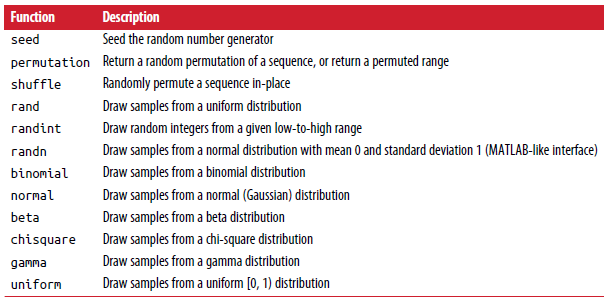
</p>

# 4.7 Example: Random Walks

The simulation of random walks provides an illustrative application of utilizing array operations

Let’s first consider a simple random walk starting at 0 with steps of 1 and –1 occurring with equal probability

Here is a pure Python way to implement a single random walk with 1,000 steps using the built-in random module:

In [608]:
import random

position = 0
walk = [position]
steps = 1000
for i in range(steps):
  step = 1 if random.randint(0, 1) else -1
  position += step
  walk.append(position)

See Figure 4-4 for an example plot of the first 100 values on one of these random walks:

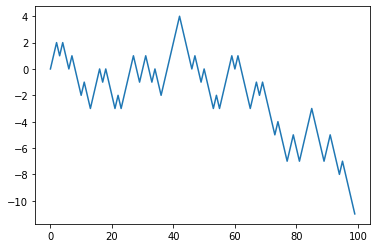

In [609]:
plt.plot(walk[:100])

Figure 4-4. A simple random walk

You might make the observation that walk is simply the cumulative sum of the random steps and could be evaluated as an array expression

Thus, I use the np.random module to draw 1,000 coin flips at once, set these to 1 and –1, and compute the cumulative sum:

In [610]:
nsteps = 1000

In [611]:
draws = np.random.randint(0, 2, size=nsteps)

In [612]:
steps = np.where(draws > 0, 1, -1)

In [613]:
walk = steps.cumsum()

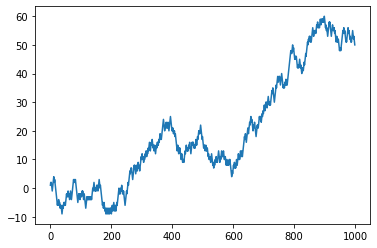

In [614]:
plt.plot(walk)

From this we can begin to extract statistics like the minimum and maximum value along the walk’s trajectory:

In [615]:
walk.min()

-9

In [616]:
walk.max()

60

A more complicated statistic is the first crossing time, the step at which the random walk reaches a particular value. Here we might want to know how long it took the random walk to get at least 10 steps away from the origin 0 in either direction

np.abs(walk) >= 10 gives us a boolean array indicating where the walk has reached or exceeded 10, but we want the index of the first 10 or –10. Turns out, we can compute this using argmax, which returns the first index of the maximum value in the boolean array (True is the maximum value):

In [617]:
(np.abs(walk) >= 10).argmax()

297

Note that using argmax here is not always efficient because it always makes a full scan of the array

In this special case, once a True is observed we know it to be the maximum value

## Simulating Many Random Walks at Once

If your goal was to simulate many random walks, say 5,000 of them, you can generate all of the random walks with minor modifications to the preceding code

If passed a 2-tuple, the numpy.random functions will generate a two-dimensional array of draws, and we can compute the cumulative sum across the rows to compute all 5,000 random walks in one shot:

In [618]:
nwalks = 5000

In [619]:
nsteps = 1000

In [620]:
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1

In [621]:
steps = np.where(draws > 0, 1, -1)

In [622]:
walks = steps.cumsum(1)

In [623]:
walks

array([[  1,   2,   3, ...,  46,  47,  46],
       [  1,   0,   1, ...,  40,  41,  42],
       [  1,   2,   3, ..., -26, -27, -28],
       ...,
       [  1,   0,   1, ...,  64,  65,  66],
       [  1,   2,   1, ...,   2,   1,   0],
       [ -1,  -2,  -3, ...,  32,  33,  34]])

Now, we can compute the maximum and minimum values obtained over all of the walks:

In [624]:
walks.max()

122

In [625]:
walks.min()

-128

Out of these walks, let’s compute the minimum crossing time to 30 or –30

This is slightly tricky because not all 5,000 of them reach 30. We can check this using the any method:

In [626]:
hits30 = (np.abs(walks) >= 30).any(1)

In [627]:
hits30

array([ True,  True,  True, ...,  True, False,  True])

In [628]:
hits30.sum()

3368

We can use this boolean array to select out the rows of walks that actually cross the absolute 30 level and call argmax across axis 1 to get the crossing times:

In [629]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)

In [630]:
crossing_times.mean()

509.99762470308787

You need only use a different random number generation function, like normal to generate normally distributed steps with some mean and standard deviation:

In [631]:
steps = np.random.normal(loc=0, scale=0.25,
                         size=(nwalks, nsteps))